<a href="https://colab.research.google.com/github/prodigyxiao/ML_Practice/blob/master/Keras_CNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install keras

In [0]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D # Convolution layer
from keras.utils import np_utils
from keras.datasets import mnist # A built in dataset

# Load pre-shuffled MNIST data
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print (X_train.shape) # 60000 samples, with each 28*28 pixels

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


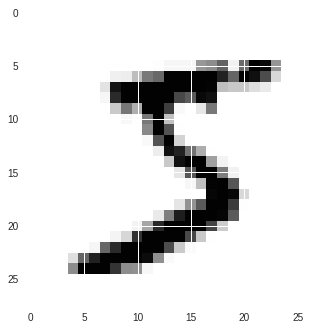

In [0]:
# Visulize MNIST data
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [0]:
# Data pre-process for X
"""
The depth of MINST picture is 1, and should be declared explicitly.
Picture with RGB three channels has depth 3.
"""
# Reshape data from (n,width,height) to (n,depth,width,height)
X_train=X_train.reshape(X_train.shape[0],1,28,28)
X_test=X_test.reshape(X_test.shape[0],1,28,28)
print (X_train.shape)

# Convert data type to float32
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

# Normalize data
X_train /= 255
X_test /= 255

(60000, 1, 28, 28)


In [0]:
# Data pre-process for class label y
print(y_train.shape)
# print(y_train[:10])
"""
y_train and y_test are not divided into 10 different class labels, but one type array.
Need one hot encoding.
"""
# Convert 1-D class array into 10-D class matrices
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print(y_train.shape)


(60000,)
(60000, 10)


In [0]:
# Create a Sequential model and add layers
# np.random.seed(1000) # For reproducibility
model = Sequential()
"""
32 is the number of CNN filters; 3 is the number of row/column of the convolution kernal.
1,28,28 is corresponding with (depth, width,height) of each picture
"""
from keras import backend as K
K.set_image_dim_ordering('th') # Solve negative dimension size caused by substracting 3 from 1 for 'Conv2D'
model.add(Convolution2D(32,3,3,activation='relu',input_shape=(1,28,28)))
print(model.output_shape)

# Add more layers
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # Reduce parameter number with a 2*2 filter, pick the max value from the filter
model.add(Dropout(0.25)) # Normalize model to prevent over-fitting

# Add full connected layers and output layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax')) # 10 is the output size
          
          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  


(None, 32, 26, 26)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [0]:
# Compile model and declare loss function and optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Fit model
model.fit(X_train,y_train,batch_size=32,nb_epoch=10,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.2126 - acc: 0.9354
Epoch 2/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0887 - acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0680 - acc: 0.9792
Epoch 4/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0563 - acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0486 - acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0417 - acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0374 - acc: 0.9883
Epoch 8/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0360 - acc: 0.9886
Epoch 9/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0307 - acc: 0.9901
Epoch 10/10
60000/60000 [==============================] - 18s 305us/step - loss: 

In [0]:
score=model.evaluate(X_test,y_test,verbose=0)
print(score)

[0.02905314213082347, 0.9917]
